In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings

# ignore specific warnings
warnings.filterwarnings("ignore", message="Treating datetime data as categorical")

# Data Preparation

In [2]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# create a function to run a query on the SQLite database and return the query result data
def get_result(query):
  conn = sqlite3.connect('/content/drive/MyDrive/Pacmann/olist.db')
  cursor = conn.cursor()
  cursor.execute(query)
  data = cursor.fetchall()
  conn.close()
  return data

# create a DataFrame from the data and columns given as parameters
def create_df(data, columns):
  return pd.DataFrame(data=data, columns=columns)

In [4]:
# from all of the columns contained in olist.db, only retrieve the columns that are needed for analysis
olist_order_dataset = create_df(get_result("SELECT order_id, customer_id, order_status, order_purchase_timestamp FROM olist_order_dataset"),
                                 ['order_id', 'customer_id','order_status', 'order_purchase_timestamp'])
olist_order_customer_dataset = create_df(get_result("SELECT customer_id, customer_city, customer_state FROM olist_order_customer_dataset"),
                                 ['customer_id', 'customer_city','customer_state'])
olist_order_items_dataset = create_df(get_result("SELECT order_id, order_item_id, product_id, price FROM olist_order_items_dataset"),
                                  ['order_id', 'order_item_id', 'product_id', 'price'])
olist_products_dataset = create_df(get_result("SELECT product_id, product_category_name FROM olist_products_dataset"),
                                  ['product_id', 'product_category_name'])
product_category_name_translation = create_df(get_result("SELECT product_category_name, product_category_name_english FROM product_category_name_translation"),
                                  ['product_category_name', 'product_category_name_english'])

In [5]:
olist_order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [6]:
olist_order_customer_dataset.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [7]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [8]:
olist_products_dataset.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [9]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Data Cleaning

## Handling Missing Values

In [10]:
olist_order_dataset.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [11]:
olist_order_customer_dataset.isna().sum()

customer_id       0
customer_city     0
customer_state    0
dtype: int64

In [12]:
olist_order_items_dataset.isna().sum()

order_id         0
order_item_id    0
product_id       0
price            0
dtype: int64

In [13]:
olist_products_dataset.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [14]:
product_category_name_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Handling Duplicates

In [15]:
# create a list to check for duplicate data in each table
table_list = [olist_order_dataset, olist_order_customer_dataset, olist_order_items_dataset, olist_products_dataset, product_category_name_translation]

for table in table_list :
  n_duplicated = table.duplicated().sum()
  print(n_duplicated)

0
0
0
0
0


# Data Manipulation

## Casting Data Type

In [16]:
olist_order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


In [17]:
olist_order_customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [18]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [19]:
olist_products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [20]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
# change the data type in the order_purchase_timestamp column from object to datetime
olist_order_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_order_dataset['order_purchase_timestamp'])
olist_order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


# Data Wrangling

## order_detail

In [22]:
# merging the olist_order_dataset and olist_order_items_dataset tables
order_detail = pd.merge(olist_order_dataset, olist_order_items_dataset, on='order_id')
order_detail = order_detail.drop('customer_id', axis=1)
order_detail.head()

,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90


In [23]:
# create new columns: order_month and order_year
order_detail['order_year'] = order_detail['order_purchase_timestamp'].dt.year
order_detail['order_month'] = order_detail['order_purchase_timestamp'].dt.month
order_detail.head()

,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,order_year,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,159.90,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2018,2


In [24]:
order_detail[['order_purchase_timestamp', 'order_year', 'order_month']].head()

,order_purchase_timestamp,order_year,order_month
0,2017-10-02 10:56:33,2017,10
1,2018-07-24 20:41:37,2018,7
2,2018-08-08 08:38:49,2018,8
3,2017-11-18 19:28:06,2017,11
4,2018-02-13 21:18:39,2018,2


In [25]:
# grouping the data based on the order_year and order_month, then count the total orders that have been 'delivered'.
order_monthly = order_detail[order_detail['order_status']=='delivered'].groupby(['order_year', 'order_month'])['order_id'].count().reset_index()
order_monthly.head()

,order_year,order_month,order_id
0,2016,9,3
1,2016,10,313
2,2016,12,1
3,2017,1,913
4,2017,2,1858


## sales_by_region

In [26]:
# merging the olist_order_dataset and olist_order_customer_dataset tables
order_region = pd.merge(olist_order_dataset, olist_order_customer_dataset, on='customer_id')
order_region = order_region.drop('customer_id', axis=1)
order_region.head()

,order_id,order_status,order_purchase_timestamp,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,santo andre,SP


In [27]:
# grouping data by city and state, then count the number of order_id with 'delivered' status and sorting them from the largest value
sales_by_region = order_region[order_region['order_status'] == 'delivered'].groupby(['customer_state', 'customer_city'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
sales_by_region.head()

,customer_state,customer_city,order_id
4138,SP,sao paulo,15045
2763,RJ,rio de janeiro,6601
1053,MG,belo horizonte,2697
598,DF,brasilia,2071
2387,PR,curitiba,1489


## best_category

In [28]:
# merging the olist_order_items_dataset and olist_products_dataset tables
order_category_name = pd.merge(olist_order_items_dataset, olist_products_dataset, on='product_id', how='left')
order_category_name.head()

,order_id,order_item_id,product_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim


In [29]:
# grouping data by product_category_name and then sum the price for each order to get the total revenue from each product category
category_revenue = order_category_name.groupby(['product_category_name'])['price'].sum().reset_index()
category_revenue = category_revenue.sort_values('price', ascending=False)
category_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)
category_revenue

,product_category_name,total_revenue
11,beleza_saude,1258681.34
66,relogios_presentes,1205005.68
13,cama_mesa_banho,1036988.68
32,esporte_lazer,988048.97
44,informatica_acessorios,911954.32
...,...,...
41,flores,1110.04
15,casa_conforto_2,760.27
17,cds_dvds_musicais,730.00
37,fashion_roupa_infanto_juvenil,569.85


In [30]:
# shows the top 10 categories
best_category = category_revenue.head(10)
best_category

,product_category_name,total_revenue
11,beleza_saude,1258681.34
66,relogios_presentes,1205005.68
13,cama_mesa_banho,1036988.68
32,esporte_lazer,988048.97
44,informatica_acessorios,911954.32
54,moveis_decoracao,729762.49
26,cool_stuff,635290.85
72,utilidades_domesticas,632248.66
8,automotivo,592720.11
40,ferramentas_jardim,485256.46


# Exploratory Data Analysis

## order_id

In [31]:
olist_order_dataset['order_id'].count()

99441

In [32]:
len(olist_order_dataset['order_id'].unique())

99441

## order_status

In [33]:
# calculate the total and percentage of each order status and then store them into a DataFrame
status_count = olist_order_dataset['order_status'].value_counts()
status_percentage = olist_order_dataset['order_status'].value_counts(normalize=True) * 100
status_order_detail = pd.DataFrame({'count': status_count, 'percentage': status_percentage})
status_order_detail

,count,percentage
delivered,96478,97.020344
shipped,1107,1.113223
canceled,625,0.628513
unavailable,609,0.612423
invoiced,314,0.315765
processing,301,0.302692
created,5,0.005028
approved,2,0.002011


## order_purchase_timestamp

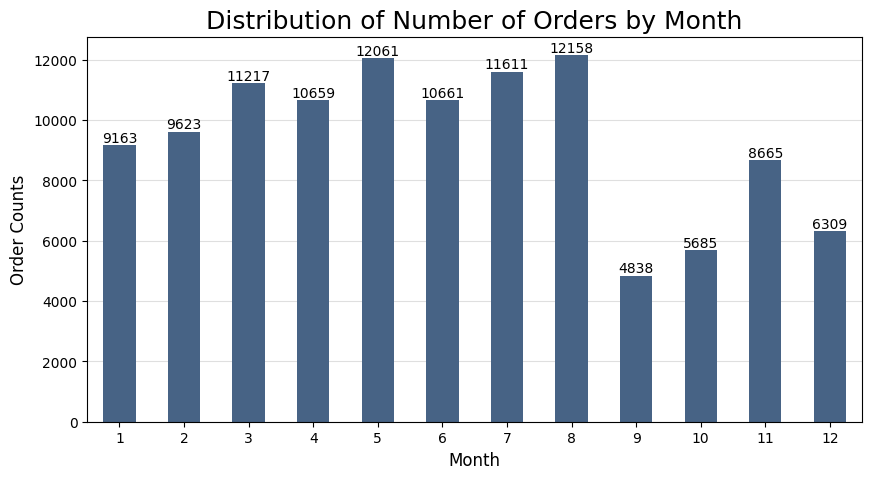

In [34]:
# visualize the distribution of count orders by month into a bar chart
order_month_distribution = order_detail.groupby('order_month')['order_id'].count()
order_month_distribution.plot(kind='bar', figsize=(10,5), color='#476385', zorder=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Order Counts', fontsize=12)
plt.title('Distribution of Number of Orders by Month', fontsize=18)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=0)
for i, v in enumerate(order_month_distribution):
    plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()

In [35]:
# average number of orders per month
order_month_distribution.mean()

9387.5

In [36]:
# the date of the first transaction
order_detail['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [37]:
# the date of the last transaction
order_detail['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

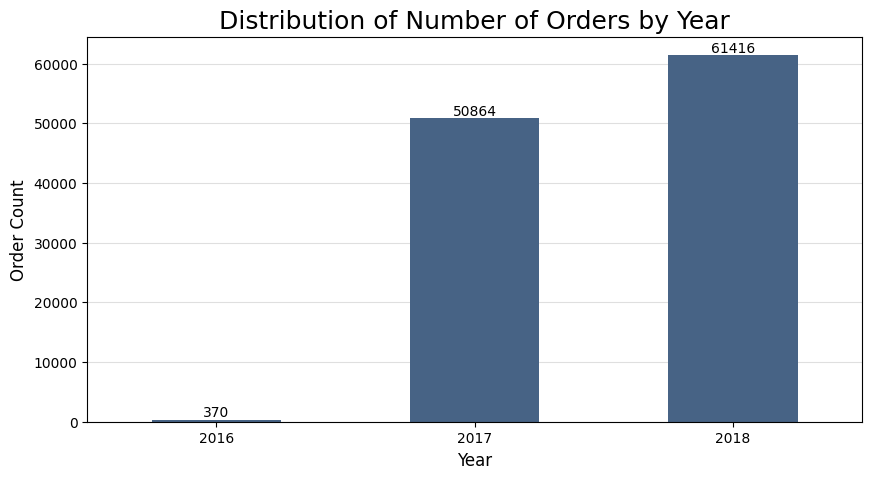

In [38]:
# visualize the distribution of count orders by year
order_year_distribution = order_detail.groupby('order_year')['order_id'].count()
order_year_distribution.plot(kind='bar', figsize=(10,5), color='#476385', zorder=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.title('Distribution of Number of Orders by Year', fontsize=18)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=0)
for i, v in enumerate(order_year_distribution):
    plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()

## customer_state and customer_city

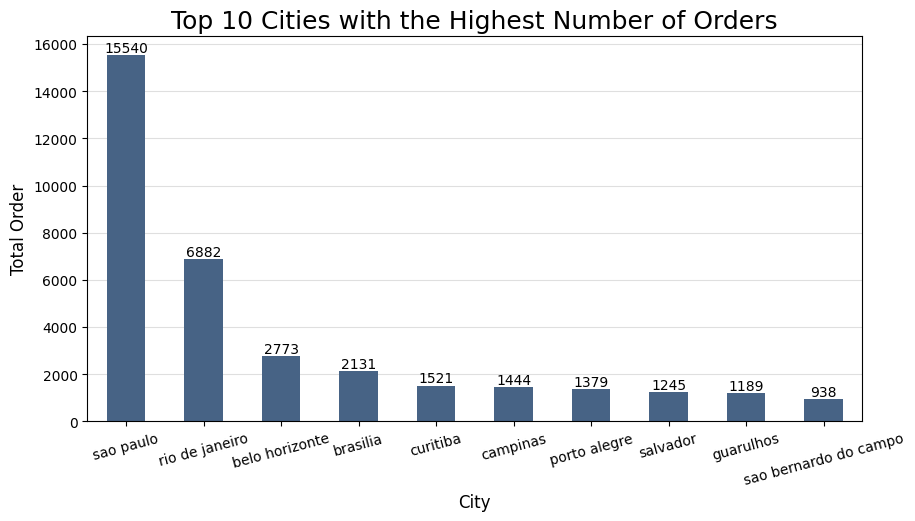

In [39]:
# visualize data from 10 cities with the highest number orders on a bar chart
customer_city_counts = order_region['customer_city'].value_counts().head(10)
customer_city_counts.plot(kind='bar', figsize=(10,5), color='#476385', zorder=2)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Order', fontsize=12)
plt.title('Top 10 Cities with the Highest Number of Orders', fontsize=18)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=15)
for i, v in enumerate(customer_city_counts):
    plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()

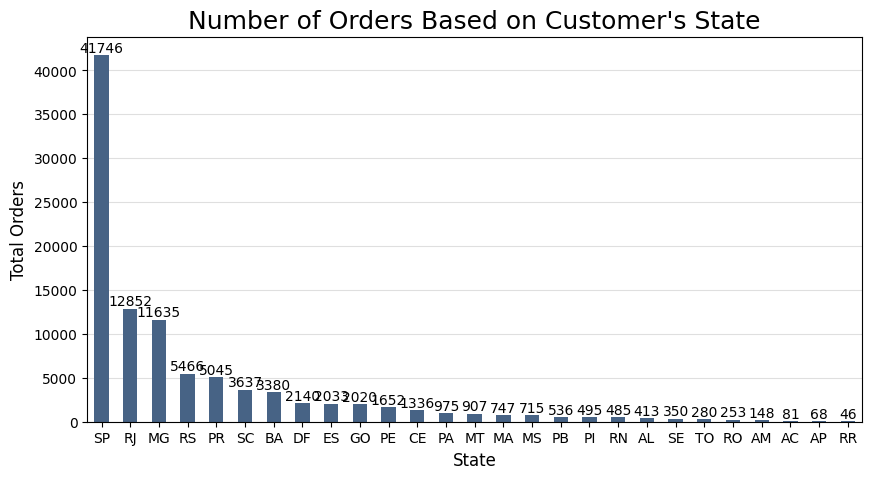

In [40]:
# visualize the state with the highest number of orders
customer_state_counts = order_region['customer_state'].value_counts()
customer_state_counts.plot(kind='bar', figsize=(10,5), color='#476385', zorder=2)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title("Number of Orders Based on Customer's State", fontsize=18)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=0)
for i, v in enumerate(customer_state_counts):
    plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()

## price

In [41]:
# merging the order_detail table with the olist_product_dataset table to get the product_category_name
order_detail_category = pd.merge(order_detail, olist_products_dataset, on='product_id')
order_detail_category.head()

,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,order_year,order_month,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,2017,10,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,2017,8,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,2017,8,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,2017,10,utilidades_domesticas
4,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,118.70,2018,7,perfumaria


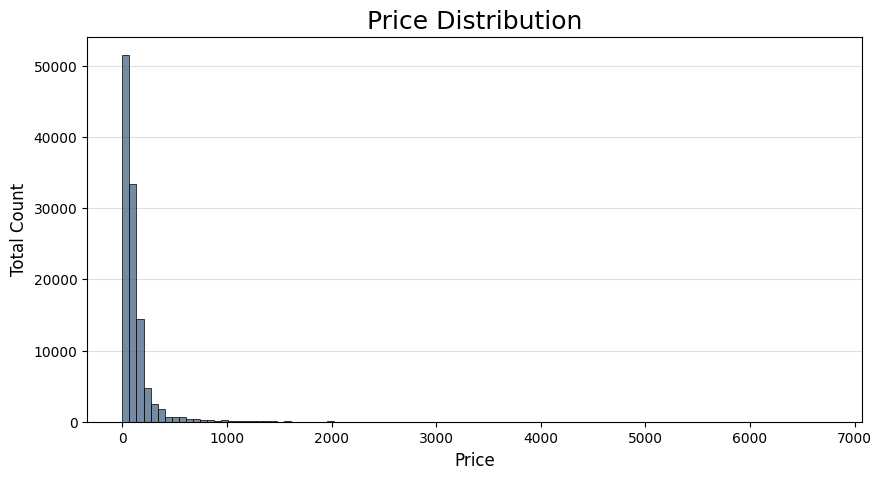

In [42]:
# visualize the distribution of price columns into a histogram
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=order_detail_category, x="price", bins=100, color='#476385', zorder=2, ax=ax)
plt.title("Price Distribution", fontsize=18)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.show()

In [43]:
# shows descriptive statistics from the price column
order_detail_category['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

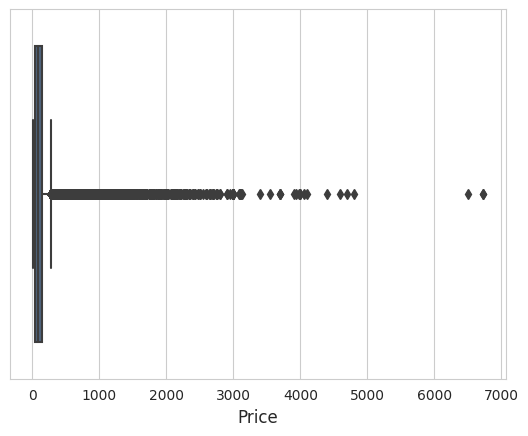

In [44]:
# visualize the price into a boxplot to identify outliers
sns.set_style("whitegrid")
sns.boxplot(x=order_detail_category['price'], color='#476385')
plt.xlabel('Price', fontsize=12)
plt.show()

In [45]:
# set the upper and lower limits as a benchmark in identifying outliers
Q1 = order_detail_category['price'].quantile(0.25)
Q3 = order_detail_category['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
upper_bound

277.4

In [46]:
# shows data that exceeds the upper and lower limits (outliers)
outliers = order_detail_category[(order_detail_category['price'] < lower_bound) | (order_detail_category['price'] > upper_bound)]
outliers.sort_values('price', ascending=False)

,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,order_year,order_month,product_category_name
78422,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,1,489ae2aa008f021502940f251d4cce7f,6735.00,2017,2,utilidades_domesticas
84179,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25 18:10:17,1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00,2018,7,pcs
38925,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,1,1bdf5e6731585cf01aa8169c7028d6ad,6499.00,2017,5,artes
98615,a96610ab360d42a2e5335a3998b4718a,delivered,2017-04-01 15:58:40,1,a6492cc69376c469ab6f61d8f44de961,4799.00,2017,4,eletroportateis
92153,199af31afc78c699f0dbf71fb178d4d4,delivered,2017-04-18 18:50:13,1,c3ed642d592594bb648ff4a04cee2747,4690.00,2017,4,eletroportateis
...,...,...,...,...,...,...,...,...,...
106655,b803962943a08a081c52d087e852358c,canceled,2018-05-06 20:15:04,1,6a041eb6fc1af9d2634e039453f67598,277.72,2018,5,beleza_saude
45214,278795fa6c02df5eb7e3549cf3722fdc,delivered,2018-04-04 14:36:46,3,917f6830695aa0ef49bbba69315a4b5d,277.47,2018,4,construcao_ferramentas_construcao
45213,278795fa6c02df5eb7e3549cf3722fdc,delivered,2018-04-04 14:36:46,2,917f6830695aa0ef49bbba69315a4b5d,277.47,2018,4,construcao_ferramentas_construcao
45212,278795fa6c02df5eb7e3549cf3722fdc,delivered,2018-04-04 14:36:46,1,917f6830695aa0ef49bbba69315a4b5d,277.47,2018,4,construcao_ferramentas_construcao


In [47]:
# merging the data with the product_category_name_translation table to get product_category_name_english
order_full_detail = pd.merge(order_detail_category, product_category_name_translation, on='product_category_name')
order_full_detail.head()

,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,order_year,order_month,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,29.99,2017,10,utilidades_domesticas,housewares
1,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,1,87285b34884572647811a353c7ac498a,29.99,2017,8,utilidades_domesticas,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,1,87285b34884572647811a353c7ac498a,29.99,2017,8,utilidades_domesticas,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,1,87285b34884572647811a353c7ac498a,29.99,2017,10,utilidades_domesticas,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,delivered,2017-11-24 21:27:48,1,be021417a6acb56b9b50d3fd2714baa8,339.00,2017,11,utilidades_domesticas,housewares


In [48]:
# filtering data and simplifying to make it easier to see the price and product_category_name_english
order_full_detail_filtered = order_full_detail[order_full_detail['price'] > 277.4]
order_full_detail_filtered[['product_category_name', 'product_category_name_english', 'price']].sort_values('price', ascending=False)

,product_category_name,product_category_name_english,price
4374,utilidades_domesticas,housewares,6735.00
110278,pcs,computers,6729.00
109561,artes,art,6499.00
97368,eletroportateis,small_appliances,4799.00
97323,eletroportateis,small_appliances,4690.00
...,...,...,...
71208,beleza_saude,health_beauty,277.72
56732,construcao_ferramentas_construcao,construction_tools_construction,277.47
56733,construcao_ferramentas_construcao,construction_tools_construction,277.47
56734,construcao_ferramentas_construcao,construction_tools_construction,277.47


# Final Analysis and Insights

## Sales trend

In [49]:
# creates a new column containing the concatenation of year and month columns
order_monthly['order_monthly'] = order_monthly.apply(lambda x: f"{x['order_year']}-{x['order_month']:02d}", axis=1)
order_monthly

,order_year,order_month,order_id,order_monthly
0,2016,9,3,2016-09
1,2016,10,313,2016-10
2,2016,12,1,2016-12
3,2017,1,913,2017-01
4,2017,2,1858,2017-02
5,2017,3,2897,2017-03
6,2017,4,2569,2017-04
7,2017,5,4004,2017-05
8,2017,6,3489,2017-06
9,2017,7,4416,2017-07


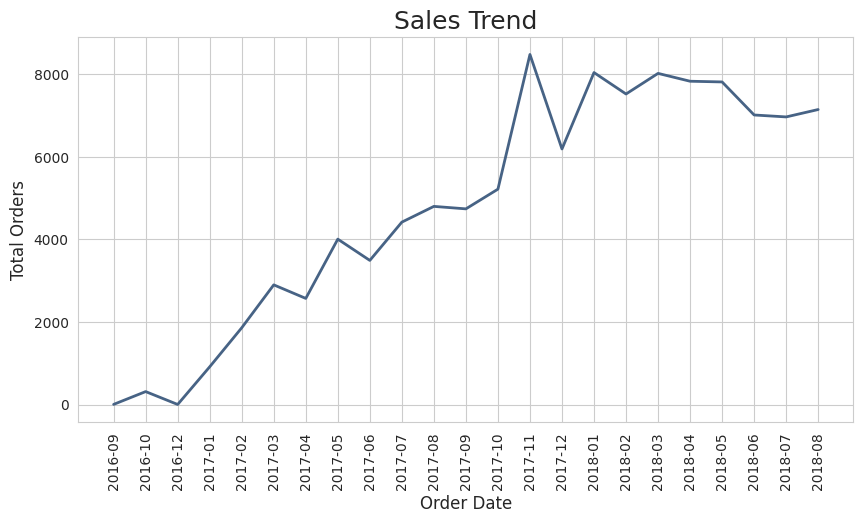

In [50]:
# visualize the data to a line chart
plt.figure(figsize=(10,5))
sns.lineplot(x='order_monthly', y='order_id', data=order_monthly, color='#476385', linewidth=2)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.title('Sales Trend', fontsize=18)
plt.xticks(rotation=90)
plt.show()

## Cities with the Highest Sales

In [51]:
top_10_city = sales_by_region.head(10)
top_10_city

,customer_state,customer_city,order_id
4138,SP,sao paulo,15045
2763,RJ,rio de janeiro,6601
1053,MG,belo horizonte,2697
598,DF,brasilia,2071
2387,PR,curitiba,1489
3692,SP,campinas,1406
3177,RS,porto alegre,1342
369,BA,salvador,1188
3799,SP,guarulhos,1144
4122,SP,sao bernardo do campo,911


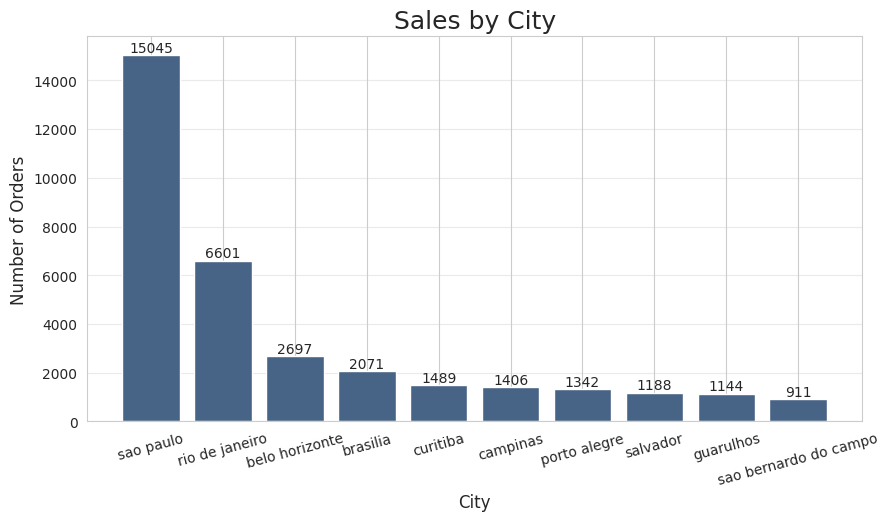

In [52]:
# visualize the data into a bar chart
plt.figure(figsize=(10, 5))
plt.bar('customer_city', 'order_id', data=top_10_city, color='#476385', zorder=2)
plt.title('Sales by City', fontsize=18)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=15)
for i, v in enumerate(top_10_city['order_id']):
  plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()

In [53]:
# identify the cities with the lowest sales
sales_by_region.tail()

,customer_state,customer_city,order_id
1287,MG,ibiracatu,1
3002,RS,capivari do sul,1
3001,RS,capitao,1
1292,MG,igaratinga,1
0,AC,brasileia,1


## Potential Product Category

In [54]:
# merging the table with the product_category_name_translation table to get the product_category_name_english
best_category_translation = pd.merge(best_category, product_category_name_translation, on='product_category_name')
best_category_translation

,product_category_name,total_revenue,product_category_name_english
0,beleza_saude,1258681.34,health_beauty
1,relogios_presentes,1205005.68,watches_gifts
2,cama_mesa_banho,1036988.68,bed_bath_table
3,esporte_lazer,988048.97,sports_leisure
4,informatica_acessorios,911954.32,computers_accessories
5,moveis_decoracao,729762.49,furniture_decor
6,cool_stuff,635290.85,cool_stuff
7,utilidades_domesticas,632248.66,housewares
8,automotivo,592720.11,auto
9,ferramentas_jardim,485256.46,garden_tools


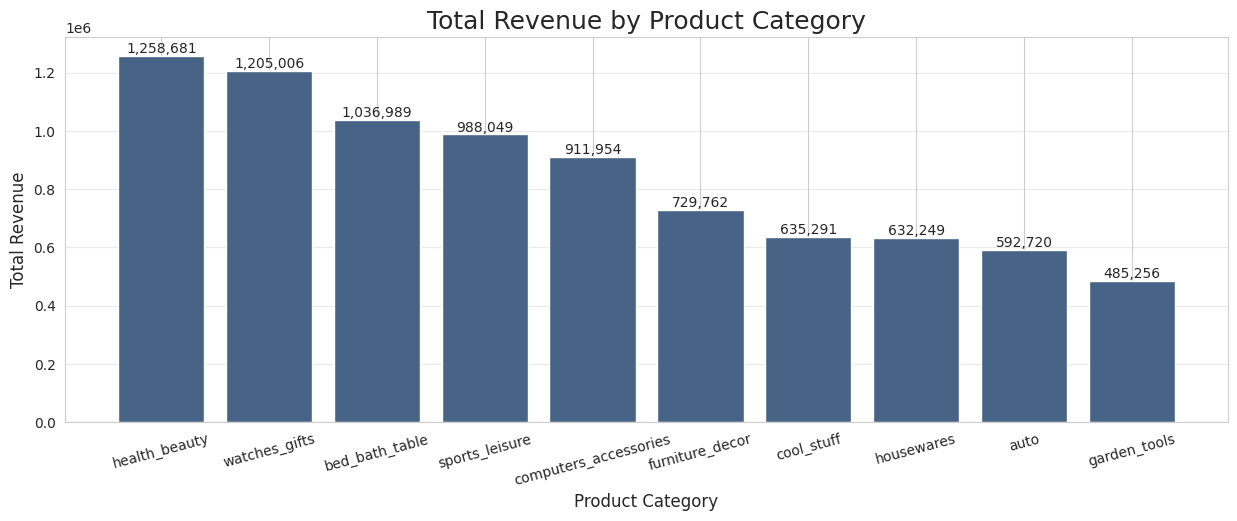

In [55]:
# visualize the data into a bar chart
plt.figure(figsize=(15, 5))
plt.bar('product_category_name_english', 'total_revenue', data=best_category_translation, color='#476385', zorder=2)
plt.title('Total Revenue by Product Category', fontsize=18)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.xticks(rotation=15)
for i, v in enumerate(best_category['total_revenue']):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)
plt.show()